In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.inf)

In [ ]:
n_epochs = 4
batch_size_train = 25
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [ ]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.RandomAffine(degrees = (-0,0),translate=(0.2,0.2)),                                      
                               torchvision.transforms.ToTensor()
                             ])),
  batch_size=batch_size_train, shuffle=True)

In [ ]:
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.RandomAffine(degrees = (-0,0),translate=(0,0)),                                                                          
                               torchvision.transforms.ToTensor()
                             ])),
  batch_size=batch_size_test, shuffle=True)

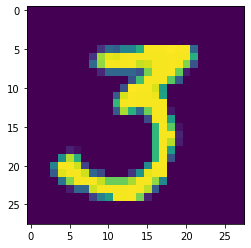

In [ ]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
plt.imshow(example_data[0][0])

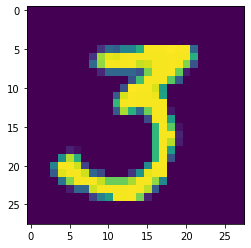

In [ ]:
ex_grid = torchvision.utils.make_grid(example_data[0], nrow=1, padding=0)
ex_grid = ex_grid[0].numpy()
plt.imshow(ex_grid)
plt.show() 

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)
    return F.log_softmax(x)        

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

In [ ]:
#Training
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), len(train_loader.dataset),100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), '/model.pth')
      torch.save(optimizer.state_dict(), '/optimizer.pth')

In [ ]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))

In [ ]:
"""test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()"""

'test()\nfor epoch in range(1, n_epochs + 1):\n  train(epoch)\n  test()'

<class 'torch.Tensor'>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


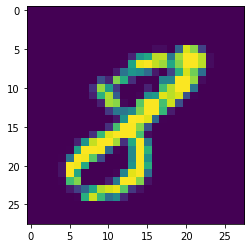

In [ ]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
test_loss = 0
correct = 0


for i in range(1):
  plt.imshow(example_data[i][0])
  print(type(example_data[0]))
  output = network(example_data[i])     #produces the output
#  print("targets",example_targets[i])
  #print("test loss",F.nll_loss(output, example_targets[i], size_average=False).item())
  pred = output.data.max(1, keepdim=True)[1]
 # print("pred", pred)
  correct += pred.eq(example_targets[i].data.view_as(pred)).sum()
  #print("correct",correct)
  #print("###############")

In [ ]:
test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3052, Accuracy: 1059/10000 (11%)



In [ ]:
# Normal mnist vs 0.3 transkate = 22%
# 0.1 trained mnist vs 0.3 translate = 40%
# 0.2 trained mnist vs 0.3 translate = 70%
# 0.2 trained mnist vs normal mnist = 96%

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))        #Doenst work otherwise
    plt.show()

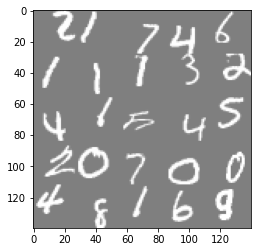

In [ ]:
# get some random training images
dataiterM = iter(train_loader)
imagesM, labelsM = dataiterM.next()

IMAG = torchvision.utils.make_grid(imagesM, nrow=5, padding=0) 

# show images

imshow(IMAG)

IMAGE = IMAG.numpy()


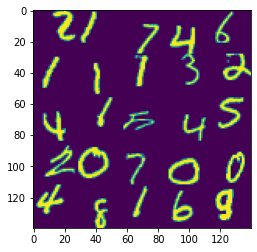

In [ ]:
##BROOM ATTACK 
#Looks for the number of '3' instances in the whole image

#We start by converting the tensor to np and adapting the image for classification.
IMG = IMAGE[0]

print(IMG.shape)

#Inference Loop
counter = 0
for i in range(140-28):
  for j in range(140-28):
    A = IMG[i:28+i,j:28+j]
    print(i,28+i,j,28+j)
    print(A.shape)

Streaming output truncated to the last 5000 lines.
89 117 76 104
(28, 28)
89 117 77 105
(28, 28)
89 117 78 106
(28, 28)
89 117 79 107
(28, 28)
89 117 80 108
(28, 28)
89 117 81 109
(28, 28)
89 117 82 110
(28, 28)
89 117 83 111
(28, 28)
89 117 84 112
(28, 28)
89 117 85 113
(28, 28)
89 117 86 114
(28, 28)
89 117 87 115
(28, 28)
89 117 88 116
(28, 28)
89 117 89 117
(28, 28)
89 117 90 118
(28, 28)
89 117 91 119
(28, 28)
89 117 92 120
(28, 28)
89 117 93 121
(28, 28)
89 117 94 122
(28, 28)
89 117 95 123
(28, 28)
89 117 96 124
(28, 28)
89 117 97 125
(28, 28)
89 117 98 126
(28, 28)
89 117 99 127
(28, 28)
89 117 100 128
(28, 28)
89 117 101 129
(28, 28)
89 117 102 130
(28, 28)
89 117 103 131
(28, 28)
89 117 104 132
(28, 28)
89 117 105 133
(28, 28)
89 117 106 134
(28, 28)
89 117 107 135
(28, 28)
89 117 108 136
(28, 28)
89 117 109 137
(28, 28)
89 117 110 138
(28, 28)
89 117 111 139
(28, 28)
90 118 0 28
(28, 28)
90 118 1 29
(28, 28)
90 118 2 30
(28, 28)
90 118 3 31
(28, 28)
90 118 4 32
(28, 28)
90 1

In [ ]:
A = IMG[0:28+0,0:28+0]

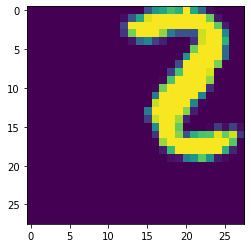

In [ ]:
plt.imshow(A)